# Match

In [1]:
from PIL import Image
import pytesseract as pt
import numpy as np
import pandas as pd

### Two methods to read the question data

If the questions are separated by black spaces

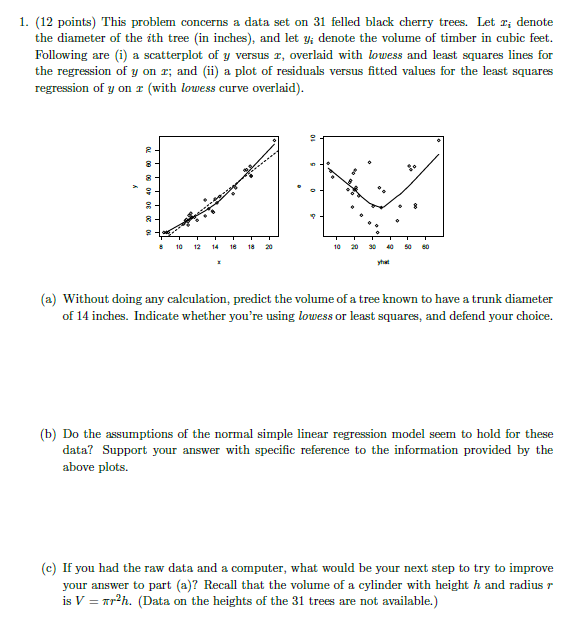

In [2]:
img1 = Image.open("images/page1.png")
img1

In [3]:
page1 = pt.image_to_string(img1, lang = "eng+equ")
page1_str = page1.split("\n\n")

for ind in range(len(page1_str)-1, 0, -1) :
    if len(page1_str[ind]) < 10:
        page1_str.pop(ind)
       
print(page1_str)
print(len(page1_str))

['1. (12 points) This problem concerns a data set on 31 felled black cherry trees. Let 2 denote\nthe diameter of the ith tree (in inches), and let yj denote the volume of timber in cubic feet.\nFollowing are ()) a scatterplot of y versus 7, overlaid with lowess and least squares lines for\nthe regression of y on 2; and (ji) a plot of residuals versus fitted values for the least squares\nregression of y on 2 (with lowess curve overlaid).', "(a) Without doing any calculation, predict the volume of a tree known to have a trunk diameter\nof 14 inches. Indicate whether you're using lowess or least squares, and defend your choice.", '(0) Do the assumptions of the normal simple linear regression model seem to hold for these\ndata? Support your answer with specific reference to the information provided by the\nabove plots.', '(©) Ifyou had the raw data and a computer, what would be your next step to try to improve\n‘your answer to part (a)? Recall that the volume ofa eylinder with height h and

If the questions are packed closely

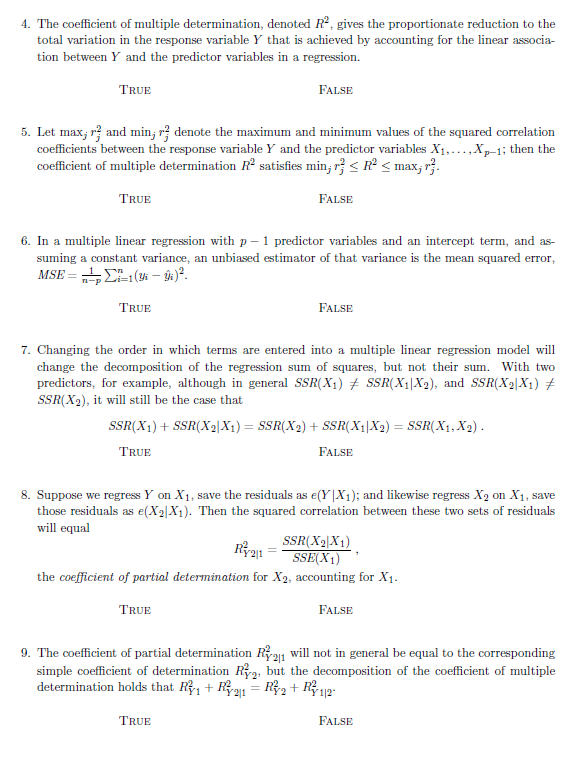

In [4]:
img2 = Image.open("images/page2.png")
img2

In [5]:
img1 = Image.open("images/ques1.png")
ques1 = pt.image_to_string(img1, lang = "eng+equ")

img2 = Image.open("images/ques2.png")
ques2 = pt.image_to_string(img2, lang = "eng+equ")
 
img3 = Image.open("images/ques3.png")
ques3 = pt.image_to_string(img3, lang = "eng+equ")
 
img4 = Image.open("images/ques4.png")
ques4 = pt.image_to_string(img4, lang = "eng+equ")
 
img5 = Image.open("images/ques5.png")
ques5 = pt.image_to_string(img5, lang = "eng+equ")
 
img6 = Image.open("images/ques6.png")
ques6 = pt.image_to_string(img6, lang = "eng+equ")
 
img7 = Image.open("images/ques7.png")
ques7 = pt.image_to_string(img7, lang = "eng+equ")
 
img8 = Image.open("images/ques8.png")
ques8 = pt.image_to_string(img8, lang = "eng+equ")
 
img9 = Image.open("images/ques9.png")
ques9 = pt.image_to_string(img9, lang = "eng+equ")
 
img10 = Image.open("images/ques10.png")
ques10 = pt.image_to_string(img10, lang = "eng+equ")

### Qustions_concepts_matrix

In [6]:
file = open("concepts.txt")
Concepts_list = file.readlines()
Concepts_list = Concepts_list[0].split(",")
Concepts_list.pop()
Concepts_list.insert(0, "quesID")
print(Concepts_list)

['quesID', 'Accelerated failure time model', 'Actuarial science', 'Adaptive clinical trial', 'Adrien-Marie Legendre', 'Affine transformation', 'Akaike information criterion', 'Analysis of covariance', 'Analysis of variance', 'Anderson–Darling test', "Anscombe's quartet", 'Approximation theory', 'ArXiv (identifier)', 'Arithmetic mean', 'Artificial intelligence', 'Asymptotic theory (statistics)', 'Autocorrelation', 'Autoregressive conditional heteroskedasticity', 'Autoregressive–moving-average model', 'Bar chart', 'Bayes estimator', 'Bayes factor', 'Bayesian experimental design', 'Bayesian inference', 'Bayesian information criterion', 'Bayesian linear regression', 'Bayesian multivariate linear regression', 'Bayesian probability', 'Bayesian statistics', 'Benthic zone', 'Bernoulli distribution', 'Beta (finance)', 'Bias of an estimator', 'Binary regression', 'Binomial distribution', 'Binomial regression', 'Bioinformatics', 'Biostatistics', 'Biplot', 'Bivariate normal distribution', 'Blinder

In [7]:
Questions_concepts_mat = pd.DataFrame(columns = Concepts_list)
print(Questions_concepts_mat)


Empty DataFrame
Columns: [quesID, Accelerated failure time model, Actuarial science, Adaptive clinical trial, Adrien-Marie Legendre, Affine transformation, Akaike information criterion, Analysis of covariance, Analysis of variance, Anderson–Darling test, Anscombe's quartet, Approximation theory, ArXiv (identifier), Arithmetic mean, Artificial intelligence, Asymptotic theory (statistics), Autocorrelation, Autoregressive conditional heteroskedasticity, Autoregressive–moving-average model, Bar chart, Bayes estimator, Bayes factor, Bayesian experimental design, Bayesian inference, Bayesian information criterion, Bayesian linear regression, Bayesian multivariate linear regression, Bayesian probability, Bayesian statistics, Benthic zone, Bernoulli distribution, Beta (finance), Bias of an estimator, Binary regression, Binomial distribution, Binomial regression, Bioinformatics, Biostatistics, Biplot, Bivariate normal distribution, Blinder–Oaxaca decomposition, Blocking (statistics), Bootstrapp

In [8]:
# Match question with concepts list
def match(ques, Concepts_list):
    tags = []
    for i in range(len(Concepts_list)):
        if ques.find(Concepts_list[i]) > 0:
            tags.append(Concepts_list[i])
    return(tags)

# Add question to the questions-concepts matrix
def add_question(quesID, ques, Questions_concepts_mat):
    Concepts_list = Questions_concepts_mat.columns[1:]
    tags = match(ques, Concepts_list)
    ques_concepts = np.zeros(len(Concepts_list))
    for i in range(len(tags)):
        ques_concepts = np.where(Concepts_list == tags[i], 1, ques_concepts)
    
    if quesID in np.array(Questions_concepts_mat["quesID"]):
        if (Questions_concepts_mat.loc[Questions_concepts_mat["quesID"] == quesID, 
                                      Questions_concepts_mat.columns != "quesID"] == ques_concepts).values.all():
            print("The question is already included.")
        else:
            Questions_concepts_mat.loc[Questions_concepts_mat["quesID"] == quesID, 
                                      Questions_concepts_mat.columns != "quesID"] = ques_concepts
            print("The question is updated.")
            
    else:
        Questions_concepts_mat.loc[len(Questions_concepts_mat), "quesID"] = quesID
        Questions_concepts_mat.loc[Questions_concepts_mat["quesID"] == quesID, 
                                      Questions_concepts_mat.columns != "quesID"] = ques_concepts
        print("The question is added.")
    
    
    if sum(ques_concepts) == 0:
        print("No concept is matched")
    
    
    return(Questions_concepts_mat)

In [9]:
Questions_concepts_mat = add_question(quesID = "0001",
                                        ques = ques1, 
                                        Questions_concepts_mat = Questions_concepts_mat)

Questions_concepts_mat = add_question(quesID = "0002",
                                        ques = ques2, 
                                        Questions_concepts_mat = Questions_concepts_mat)

Questions_concepts_mat = add_question(quesID = "0003",
                                        ques = ques3, 
                                        Questions_concepts_mat = Questions_concepts_mat)

Questions_concepts_mat = add_question(quesID = "0004",
                                        ques = ques4, 
                                        Questions_concepts_mat = Questions_concepts_mat)

Questions_concepts_mat = add_question(quesID = "0005",
                                        ques = ques5, 
                                        Questions_concepts_mat = Questions_concepts_mat)

Questions_concepts_mat = add_question(quesID = "0006",
                                        ques = ques6, 
                                        Questions_concepts_mat = Questions_concepts_mat)

Questions_concepts_mat = add_question(quesID = "0007",
                                        ques = ques7, 
                                        Questions_concepts_mat = Questions_concepts_mat)

Questions_concepts_mat = add_question(quesID = "0008",
                                        ques = ques8, 
                                        Questions_concepts_mat = Questions_concepts_mat)

Questions_concepts_mat = add_question(quesID = "0009",
                                        ques = ques9, 
                                        Questions_concepts_mat = Questions_concepts_mat)

Questions_concepts_mat = add_question(quesID = "0010",
                                        ques = ques10, 
                                        Questions_concepts_mat = Questions_concepts_mat)

The question is added.
No concept is matched
The question is added.
No concept is matched
The question is added.
No concept is matched
The question is added.
No concept is matched
The question is added.
No concept is matched
The question is added.
No concept is matched
The question is added.
No concept is matched
The question is added.
No concept is matched
The question is added.
No concept is matched
The question is added.
No concept is matched


In [10]:
print(Questions_concepts_mat)

  quesID Accelerated failure time model Actuarial science  \
0   0001                              0                 0   
1   0002                              0                 0   
2   0003                              0                 0   
3   0004                              0                 0   
4   0005                              0                 0   
5   0006                              0                 0   
6   0007                              0                 0   
7   0008                              0                 0   
8   0009                              0                 0   
9   0010                              0                 0   

  Adaptive clinical trial Adrien-Marie Legendre Affine transformation  \
0                       0                     0                     0   
1                       0                     0                     0   
2                       0                     0                     0   
3                       0           

### re

In [11]:
import re

def match(ques, Concepts_list):
    tags = []
    for i in range(len(Concepts_list)):
        if bool(re.search(Concepts_list[i], ques, re.IGNORECASE)):
            tags.append(Concepts_list[i])
    return(tags)

In [12]:
Questions_concepts_mat = add_question(quesID = "0001",
                                        ques = ques1, 
                                        Questions_concepts_mat = Questions_concepts_mat)

Questions_concepts_mat = add_question(quesID = "0002",
                                        ques = ques2, 
                                        Questions_concepts_mat = Questions_concepts_mat)

Questions_concepts_mat = add_question(quesID = "0003",
                                        ques = ques3, 
                                        Questions_concepts_mat = Questions_concepts_mat)

Questions_concepts_mat = add_question(quesID = "0004",
                                        ques = ques4, 
                                        Questions_concepts_mat = Questions_concepts_mat)

Questions_concepts_mat = add_question(quesID = "0005",
                                        ques = ques5, 
                                        Questions_concepts_mat = Questions_concepts_mat)

Questions_concepts_mat = add_question(quesID = "0006",
                                        ques = ques6, 
                                        Questions_concepts_mat = Questions_concepts_mat)

Questions_concepts_mat = add_question(quesID = "0007",
                                        ques = ques7, 
                                        Questions_concepts_mat = Questions_concepts_mat)

Questions_concepts_mat = add_question(quesID = "0008",
                                        ques = ques8, 
                                        Questions_concepts_mat = Questions_concepts_mat)

Questions_concepts_mat = add_question(quesID = "0009",
                                        ques = ques9, 
                                        Questions_concepts_mat = Questions_concepts_mat)

Questions_concepts_mat = add_question(quesID = "0010",
                                        ques = ques10, 
                                        Questions_concepts_mat = Questions_concepts_mat)

The question is updated.
The question is updated.
The question is updated.
The question is already included.
No concept is matched
The question is updated.
The question is updated.
The question is already included.
No concept is matched
The question is updated.
The question is updated.
The question is updated.


### FuzzyWuzzy
Approximate string matching

In [13]:
# pip install fuzzywuzzy

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

D:\Program\Anaconda\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [14]:
fuzz.ratio("linear regression", "ilnear regression")

94

In [15]:
fuzz.partial_ratio("linear regression", "ilnear regression")

97

In [16]:
fuzz.partial_ratio("linear regression", "ilnear regresions normal distribution probability mathematics 123456789")

88

In [17]:
def match(ques, Concepts_list):
    tags = []
    for i in range(len(Concepts_list)):
        if (bool(re.search(Concepts_list[i], ques, re.IGNORECASE)) 
            | fuzz.partial_ratio(Concepts_list[i], ques) > 85):
            tags.append(Concepts_list[i])
    return(tags)

In [18]:
Questions_concepts_mat = add_question(quesID = "0001",
                                        ques = ques1, 
                                        Questions_concepts_mat = Questions_concepts_mat)

Questions_concepts_mat = add_question(quesID = "0002",
                                        ques = ques2, 
                                        Questions_concepts_mat = Questions_concepts_mat)

Questions_concepts_mat = add_question(quesID = "0003",
                                        ques = ques3, 
                                        Questions_concepts_mat = Questions_concepts_mat)

Questions_concepts_mat = add_question(quesID = "0004",
                                        ques = ques4, 
                                        Questions_concepts_mat = Questions_concepts_mat)

Questions_concepts_mat = add_question(quesID = "0005",
                                        ques = ques5, 
                                        Questions_concepts_mat = Questions_concepts_mat)

Questions_concepts_mat = add_question(quesID = "0006",
                                        ques = ques6, 
                                        Questions_concepts_mat = Questions_concepts_mat)

Questions_concepts_mat = add_question(quesID = "0007",
                                        ques = ques7, 
                                        Questions_concepts_mat = Questions_concepts_mat)

Questions_concepts_mat = add_question(quesID = "0008",
                                        ques = ques8, 
                                        Questions_concepts_mat = Questions_concepts_mat)

Questions_concepts_mat = add_question(quesID = "0009",
                                        ques = ques9, 
                                        Questions_concepts_mat = Questions_concepts_mat)

Questions_concepts_mat = add_question(quesID = "0010",
                                        ques = ques10, 
                                        Questions_concepts_mat = Questions_concepts_mat)

The question is already included.
The question is already included.
The question is already included.
The question is already included.
No concept is matched
The question is updated.
No concept is matched
The question is updated.
The question is updated.
The question is updated.
No concept is matched
The question is updated.
No concept is matched
The question is updated.
No concept is matched


In [19]:
ques3

'3. If we take the residuals from the regression of y on #1, and plot them versus the residuals from\nregressing v2 on «1, the intercept for the least squares regression line on this plot will be exactly\nequal to zero.'

In [20]:
Questions_concepts_mat.columns[np.where(Questions_concepts_mat.loc[Questions_concepts_mat["quesID"] == "0003"] == 1)[1]]

Index(['Least squares'], dtype='object')

### What is next?

* More questions 
* Relationship of concepts
* Functions to do recommendation.
* UI to add questions and concepts